## Import data and Required Liabraries

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel("Data_Train.xlsx")
df.head()

In [2]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### Check Null Values

In [3]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### Check Information and Datatype of all columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


###  Change the Datatype of column Total_Stops

In [5]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [6]:
df['Total_Stops'] = df['Total_Stops'].str.replace('non-stop','0')
df['Total_Stops'] = df['Total_Stops'].str.replace('1 stop','1')
df['Total_Stops'] = df['Total_Stops'].str.replace('2 stops','2')
df['Total_Stops'] = df['Total_Stops'].str.replace('3 stops','3')
df['Total_Stops'] = df['Total_Stops'].str.replace('4 stops','4')
df['Total_Stops'] = df['Total_Stops'].astype(float)
df['Total_Stops'] = df['Total_Stops'].fillna(df['Total_Stops'].median())
df['Total_Stops'] = df['Total_Stops'].astype(int)
df.Total_Stops.unique()

array([0, 2, 1, 3, 4])

In [7]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops         int32
Additional_Info    object
Price               int64
dtype: object

### Change the data of column Date_of_Journey to Datetime 

In [8]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey']).dt.date

In [9]:
df.Arrival_Time.unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [10]:
df['Arrival_Time'] = [i.split(' ')[0] for i in df['Arrival_Time']]

### Categorical Features

In [11]:
cat_features = [i for i in df.columns if df[i].dtypes == 'O']
print("We have {} Catergorical features: {}".format(len(cat_features),cat_features))

We have 9 Catergorical features: ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info']


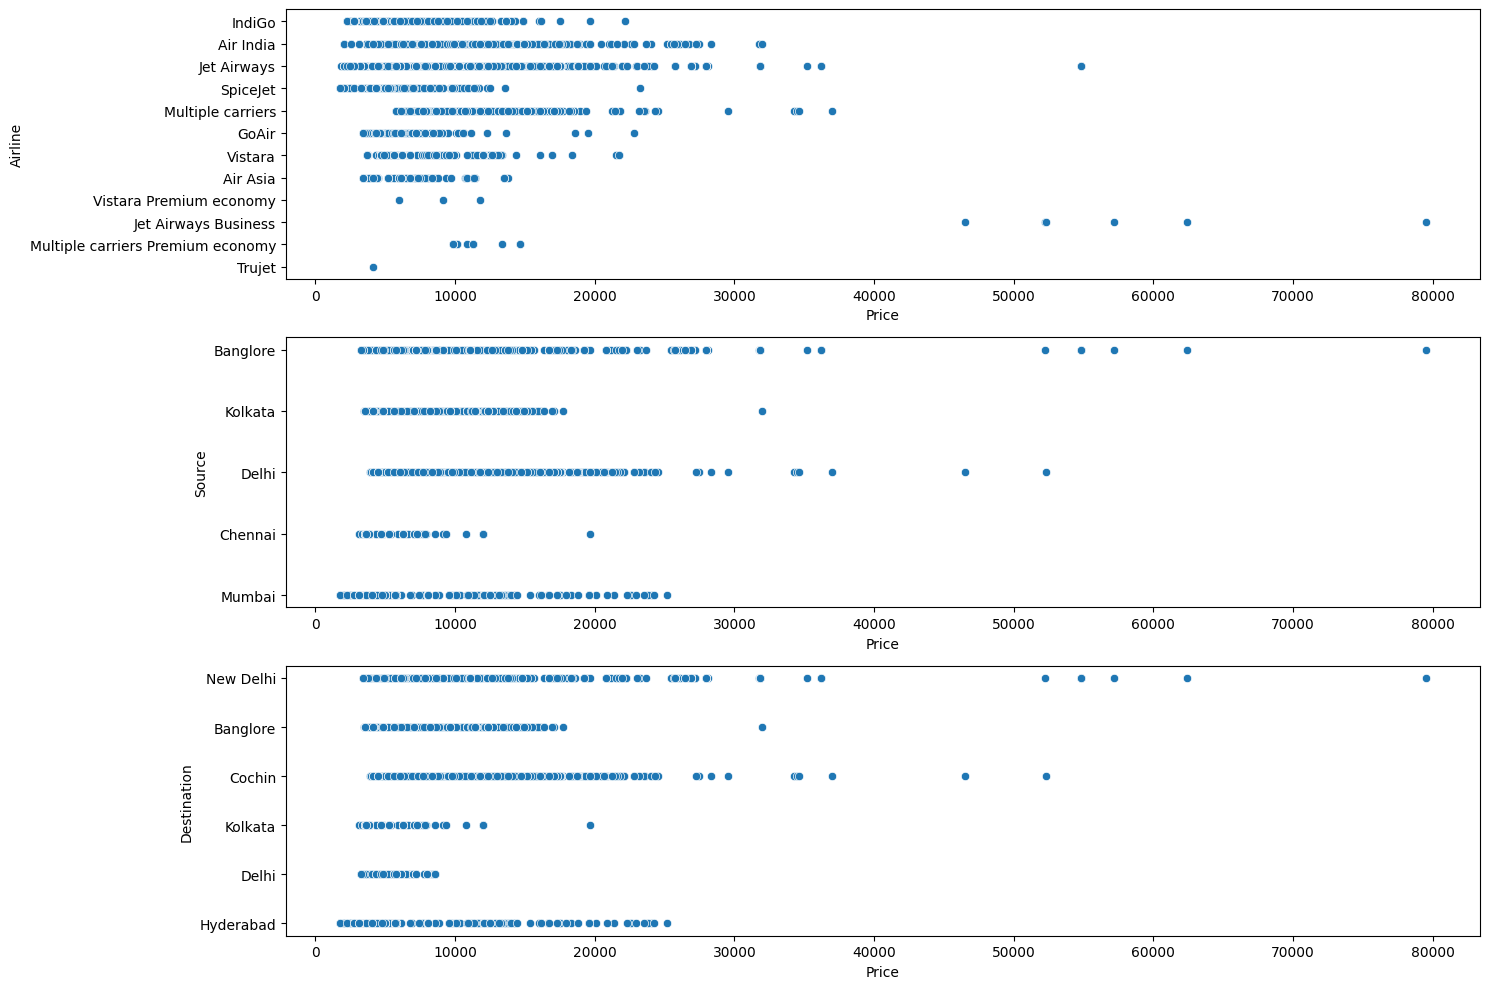

In [94]:
lst = ['Airline','Source','Destination']
fig = plt.figure(figsize=(15,10))
for i in range(0,len(lst)):
    ax = plt.subplot(3,1,i+1)
    sns.scatterplot(x='Price',y=lst[i],data=df)
    plt.tight_layout()

**Report** 
* Price is high on Destination Delhi and Source Banglore
* Price also high for Jet Airways and Jet Airways Business Airline

In [95]:
df['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

**Report** 
* Total 2376 flights are Delhi to Cochin Route.
* Total 1552 flights are Bengluru to Delhi Route.
* Total 979 flights are Kolkata to Bengluru Route.

Text(0, 0.5, 'Route')

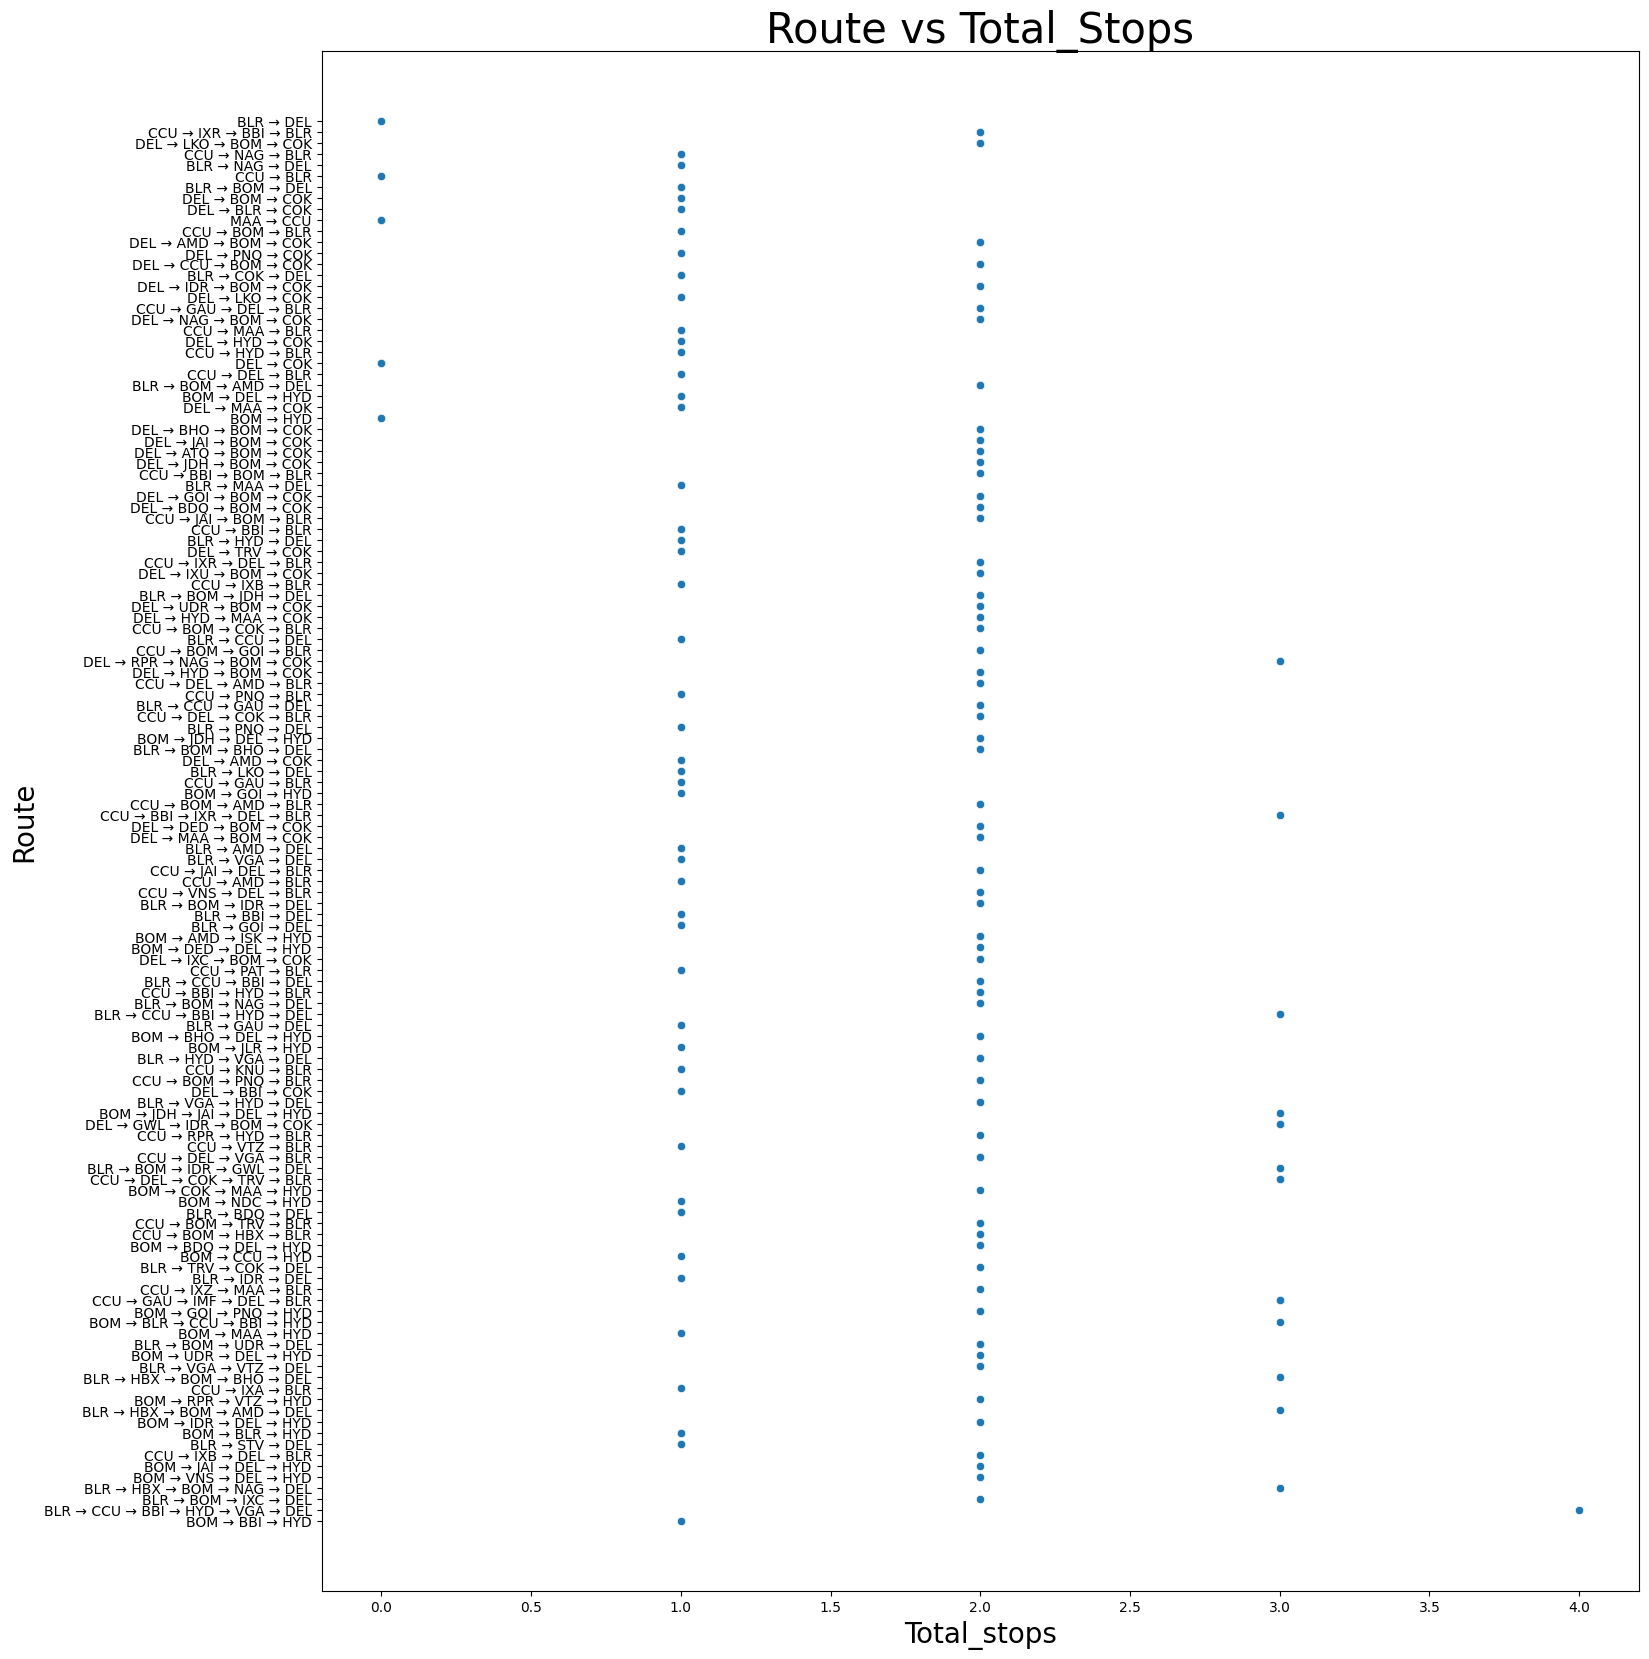

In [96]:
fig = plt.figure(figsize=(17,20))
plt.title('Route vs Total_Stops',fontsize=30,y=1.)
sns.scatterplot(y='Route',x='Total_Stops',data=df)
plt.xlabel("Total_stops",fontsize=20,weight=20)
plt.ylabel("Route",fontsize=20,weight=20)

**Report** 
* Bengluru to Delhi,Mumbai to Hyderabad,Delhi to Kolkata,Kolkata to Bengluru and Madras International Meenambakkam to Delhi has 0  Stops.
* Bengluru to Kolkata to Bhubaneswar to Hydrabad to Vijayawada to Delhi has 4 Stops.
* Maximum 2 stops Airlines are present. 

Text(0, 0.5, 'Route')

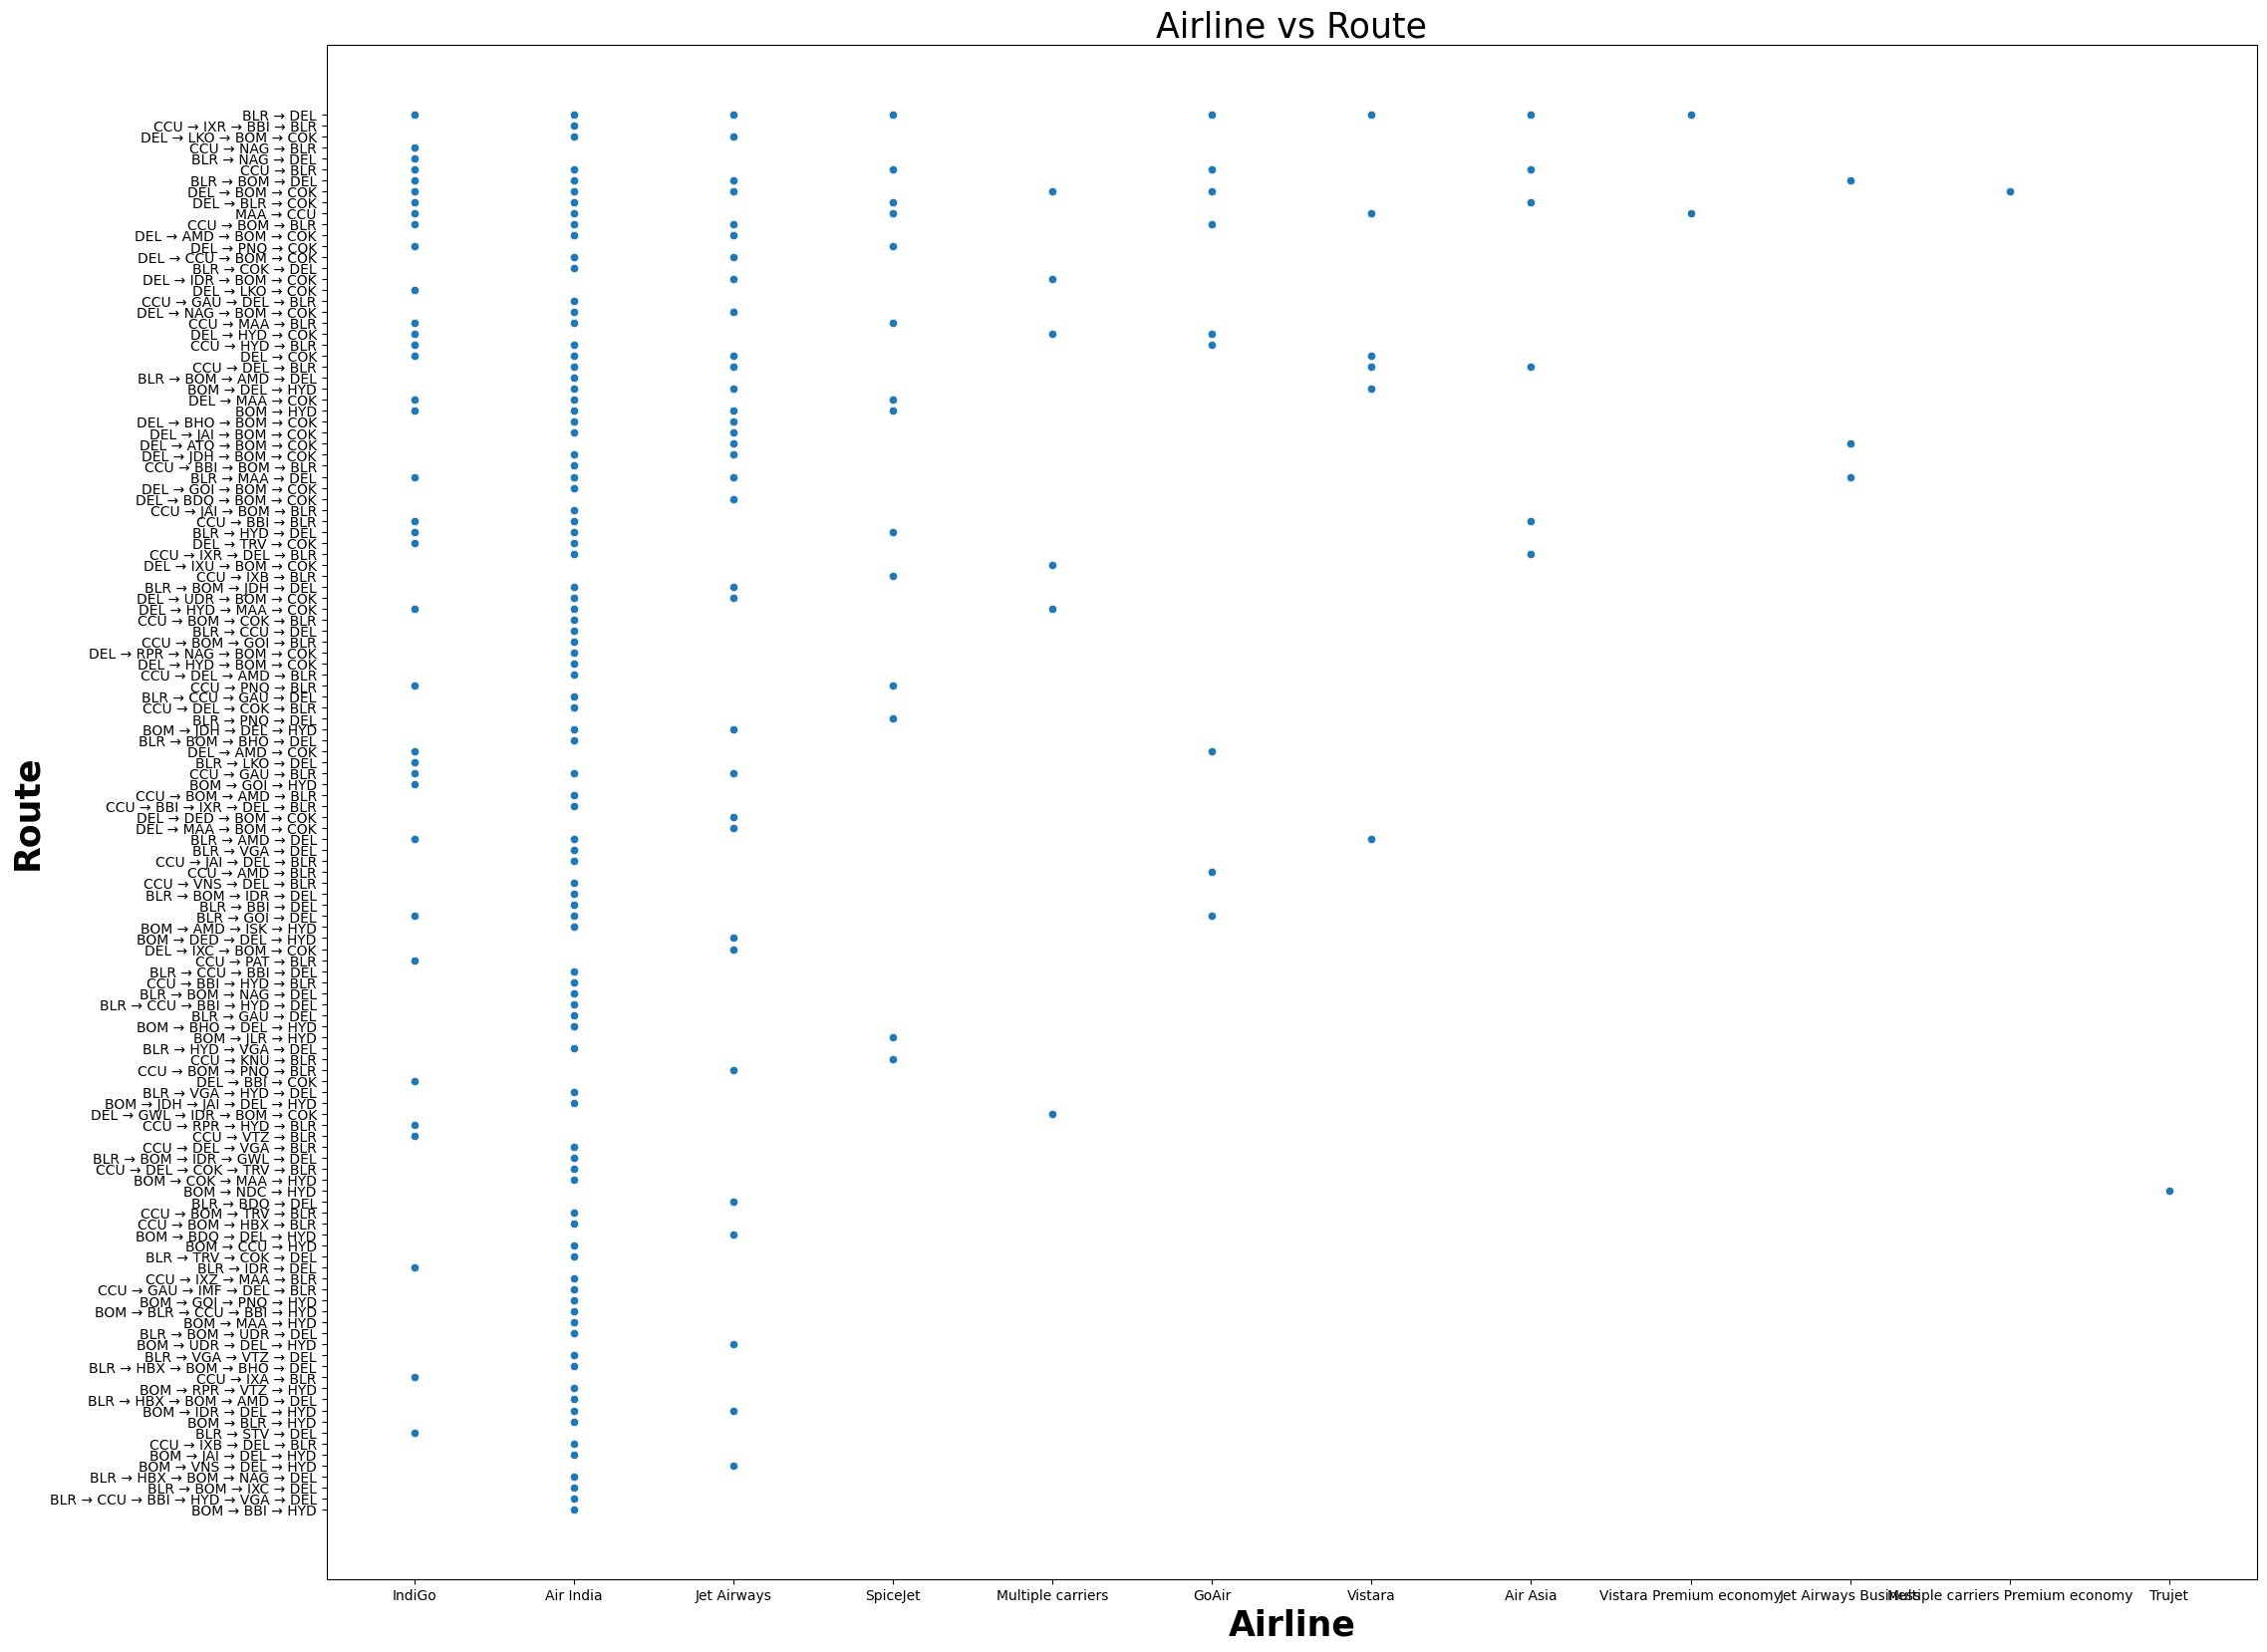

In [97]:
fig = plt.figure(figsize=(25,20))
plt.title("Airline vs Route",fontsize=25,y=1.)
sns.scatterplot(x='Airline',y='Route',data=df)
plt.xlabel("Airline",fontsize=25,weight='bold')
plt.ylabel("Route",fontsize=25,weight='bold')

**Observation**  
* Air India flights pass through each of the given routes.

In [98]:
values = df['Airline'].value_counts().values
index = df['Airline'].value_counts().index

([<matplotlib.patches.Wedge at 0x264b1218bb0>,
 [Text(-0.39773705465654735, 1.0255755629660521, 'Jet Airways'),
  Text(-0.9256303845761203, -0.5943133778987847, 'IndiGo'),
  Text(0.15581827908060944, -1.0889080144366454, 'Air India'),
  Text(0.9413462175209677, -0.5690934007339807, 'Multiple carriers'),
  Text(1.0979685036102675, 0.06682189072325276, 'SpiceJet'),
  Text(0.99044073153845, 0.4785678189239015, 'Vistara'),
  Text(0.8486202227459552, 0.6998883607737776, 'Air Asia')],
 [Text(-0.2169474843581167, 0.5594048525269375, '36.78%'),
  Text(-0.5048893006778837, -0.32417093339933706, '19.62%'),
  Text(0.08499178858942331, -0.5939498260563519, '16.74%'),
  Text(0.513461573193255, -0.3104145822185349, '11.43%'),
  Text(0.5988919110601458, 0.03644830403086514, '7.82%'),
  Text(0.5402403990209727, 0.26103699214030984, '4.58%'),
  Text(0.46288375786143005, 0.38175728769478773, '3.05%')])

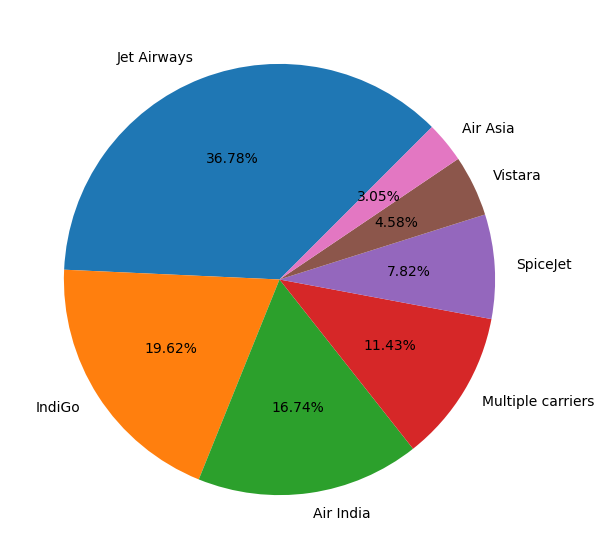

In [103]:
fig = plt.figure(figsize=(10,7))
plt.pie(values[:7],labels=index[:7],startangle=45,autopct='%.2f%%')

**Observation**
* Total 36.78% Jet Airways flights are available.
* In data 19.62% IndiGo and 16.74% Air India flights are Available.

Text(0, 0.5, 'Airline')

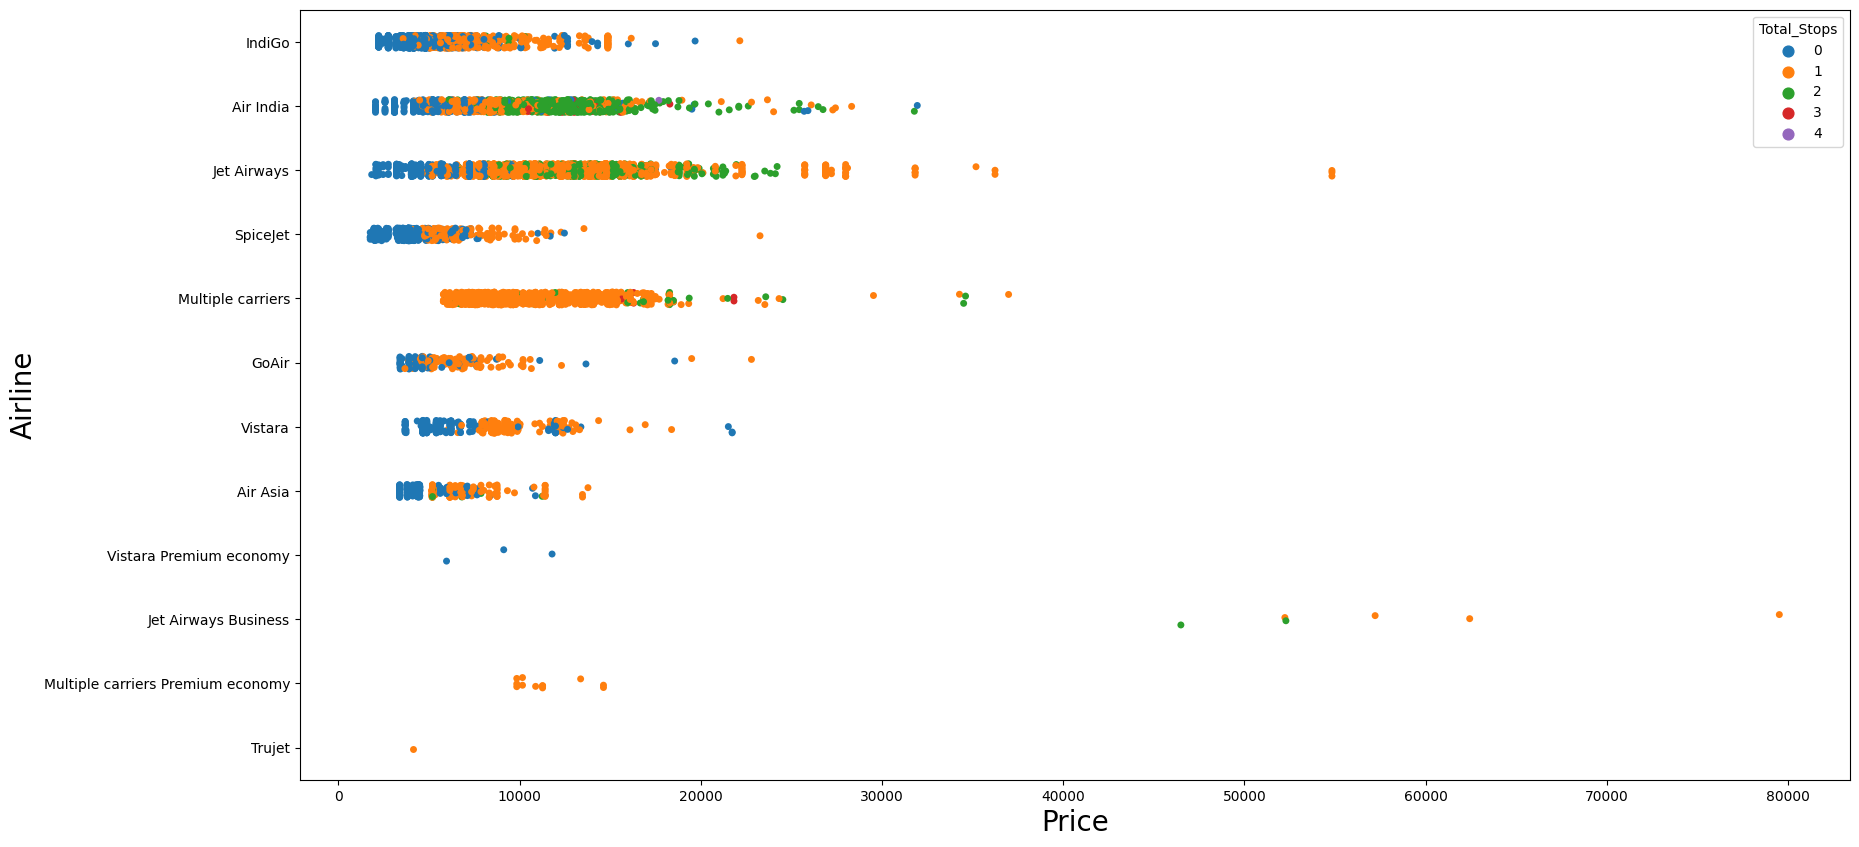

In [101]:
fig = plt.figure(figsize=(20,10))
sns.stripplot(y='Airline',x='Price',data=df,hue='Total_Stops')
plt.xlabel('Price',fontsize=20,weight=20)
plt.ylabel('Airline',fontsize=20,weight=20)

**Report** 
* The only one AirIndia flight has 4 stops.

Text(0, 0.5, 'Airline')

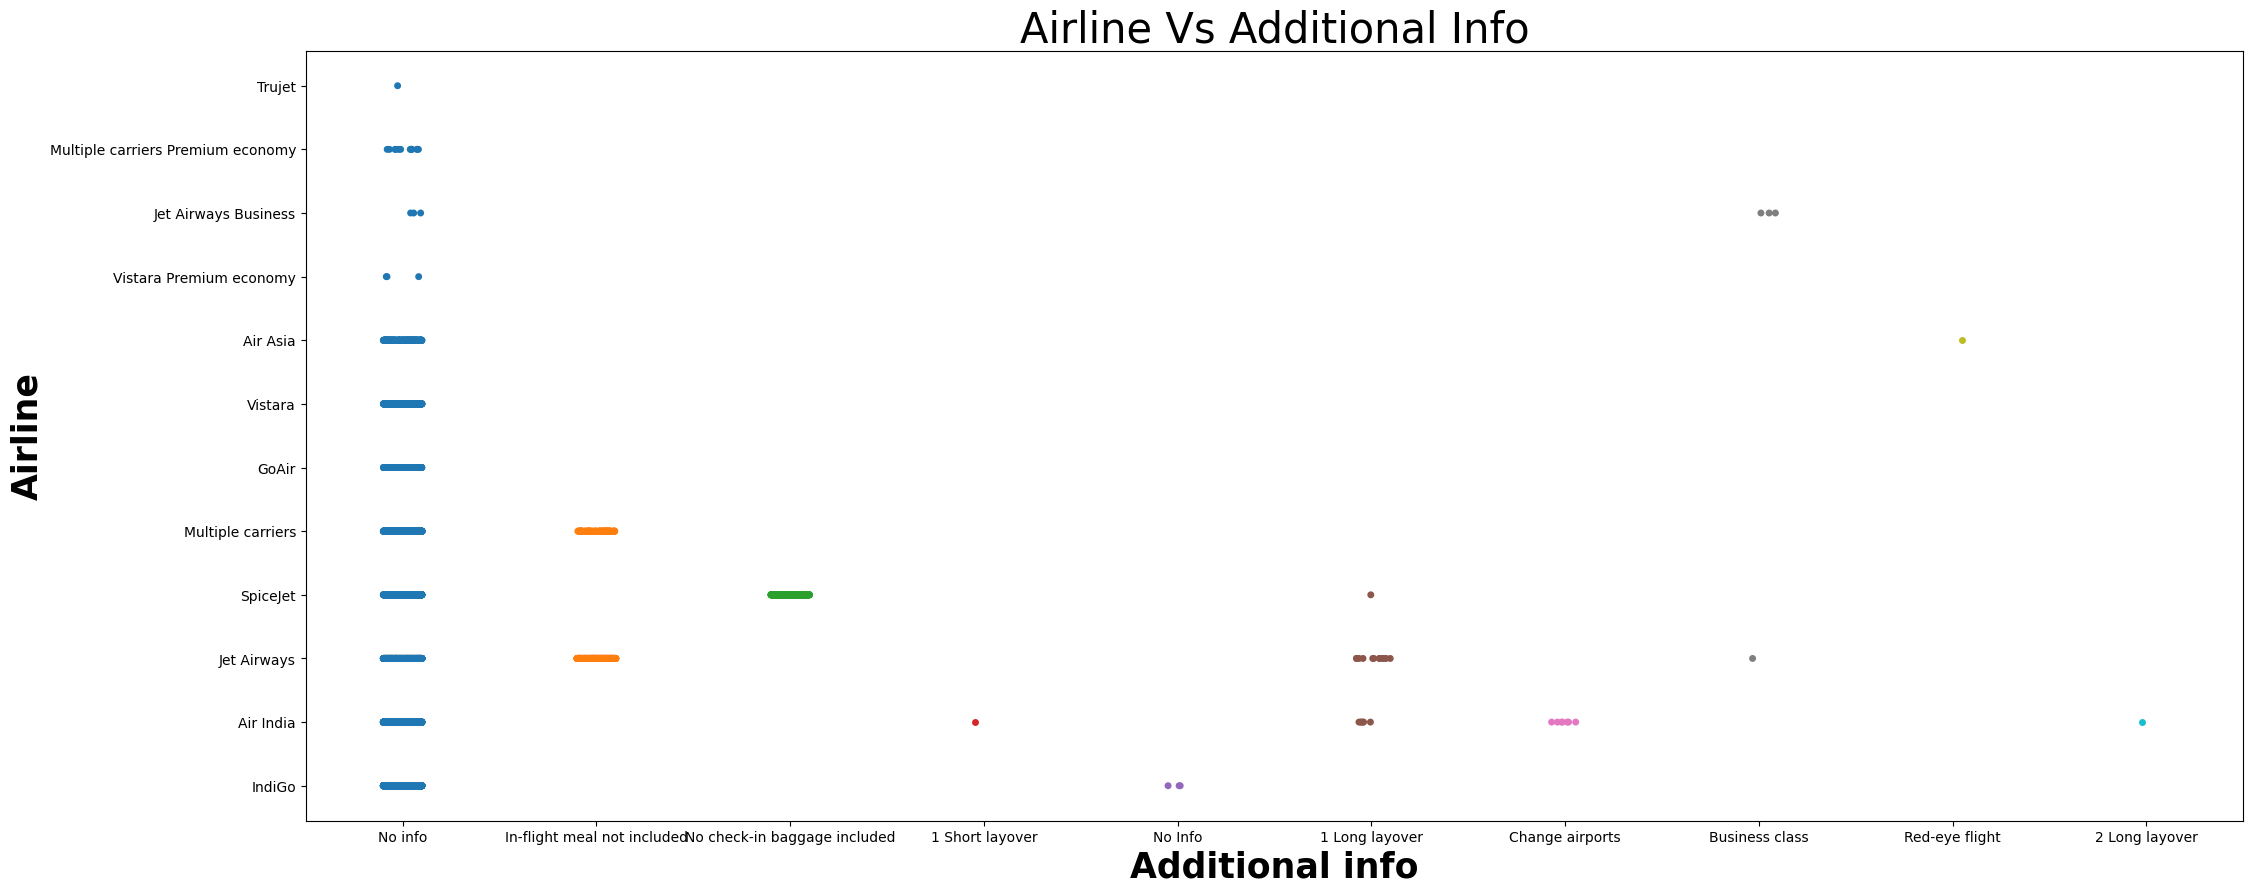

In [55]:
fig = plt.figure(figsize=(25,10))
plt.title("Airline Vs Additional Info",fontsize=30,y=1.)
sns.stripplot(y='Airline',x='Additional_Info',data=df)
plt.xlabel("Additional info",fontsize=25,weight='bold')
plt.ylabel("Airline",fontsize=25,weight='bold')